In [1]:
import os
import torch
from datasets import load_dataset
from transformers import TrOCRProcessor, VisionEncoderDecoderModel
from PIL import Image
import matplotlib.pyplot as plt
from huggingface_hub import hf_hub_download

/Users/sergio/Documents/OCR_project/ocr_venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Read Images

In [6]:
dataset = load_dataset("ai-forever/school_notebooks_EN", 
                       revision="refs/convert/parquet")
dataset

Generating train split: 70 examples [00:00, 329.51 examples/s]
Generating validation split: 10 examples [00:00, 409.00 examples/s]
Generating test split: 10 examples [00:00, 426.17 examples/s]


DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 70
    })
    validation: Dataset({
        features: ['image'],
        num_rows: 10
    })
    test: Dataset({
        features: ['image'],
        num_rows: 10
    })
})

<class 'PIL.JpegImagePlugin.JpegImageFile'> (3000, 4000)


(np.float64(-0.5), np.float64(2999.5), np.float64(3999.5), np.float64(-0.5))

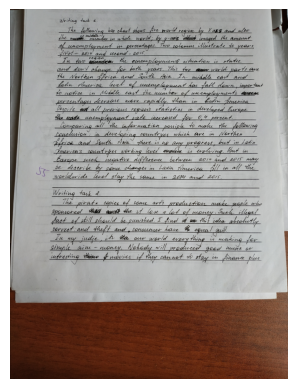

In [7]:
sample = dataset["train"][0]
img = sample["image"]
print(type(img), img.size)

plt.imshow(img)
plt.axis("off")

(np.float64(-0.5), np.float64(2449.5), np.float64(89.5), np.float64(-0.5))

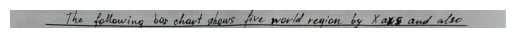

In [27]:
bbox = (350, 180, 2800, 270)  
crop = img.crop(bbox)
plt.imshow(crop)
plt.axis("off")

In [10]:
processor = TrOCRProcessor.from_pretrained("microsoft/trocr-base-handwritten")
model = VisionEncoderDecoderModel.from_pretrained("microsoft/trocr-base-handwritten")
model.eval()

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.
Some weights of VisionEncoderDecoderModel were not initialized from the model checkpoint at microsoft/trocr-base-handwritten and are newly initialized: ['encoder.pooler.dense.bias', 'encoder.pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


VisionEncoderDecoderModel(
  (encoder): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=False)
              (key): Linear(in_features=768, out_features=768, bias=False)
              (value): Linear(in_features=768, out_features=768, bias=False)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (i

In [29]:
pixel_values = processor(images=crop, return_tensors="pt").pixel_values
with torch.no_grad():
    generated_ids = model.generate(pixel_values, max_length=256)

generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0]
print(generated_text)

# The following two chart shows five world region by XO. and also
